## Name: [Abdelrahman Eweis]
## ID: [202100752]

<h1><center><font color=darkred> 
    Midterm</font></center></h1>

## Question 1 
### Calories prediction:

About fitbit dataset: Fitbit Inc. is an American company known for its products of the same name, which are activity trackers, wireless-enabled wearable technology devices that measure data such as the number of steps walked, heart rate, quality of sleep, steps climbed, and other personal metrics. The first of these was the Fitbit Tracker.

We need to use Machine learning to determine the Calories burned based on the number of steps he walked (Count), Distance covered and Speed Since we want to "PREDICT" a missing attribute.

<br>__Columns:__
- time_offset 
- end_time
- speed
- pkg_name 
- start_time 
- count
- sample_position_type
- calorie
- distance

<br>In this problem, you will apply basic machine learning concepts on data collected to determine the Calories burned. 

------------------------------

### Importing the libraries

In [939]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

### Importing the dataset

In [940]:
data = pd.read_csv('fitbit_dataset.csv')
data.head()

,time_offset,end_time,speed,pkg_name,start_time,count,sample_position_type,calorie,distance,datauuid,deviceuuid,update_time,create_time
0,19800000,57:00.0,1.638889,com.sec.android.app.shealth,56:00.0,5,NaN,0.20,3.20,7ba6b7d2-519c-41f9-8706-d3edafa3b0fc,MdS75U+XxL,23:57.0,23:55.8
1,19800000,57:00.0,1.638889,com.sec.android.app.shealth,56:00.0,6,NaN,0.24,4.78,7ba6b7d2-519c-41f9-8706-d3edafa3b0fc,MdS75U+XxL,23:57.0,23:55.8
2,19800000,57:00.0,0.916667,com.sec.android.app.shealth,56:00.0,1,NaN,0.04,0.58,9568572f-f33d-43ed-8dbd-aa7033744b3d,MdS75U+XxL,23:55.8,23:55.8
3,19800000,53:00.0,2.888889,com.sec.android.app.shealth,52:00.0,25,NaN,2.74,22.26,a144cb82-f4b1-4011-ae2c-7c8754273558,MdS75U+XxL,23:55.8,23:55.8
4,19800000,57:00.0,1.694444,com.sec.android.app.shealth,56:00.0,12,NaN,0.48,8.85,88278acc-964a-44ca-a4d7-bf696804582f,MdS75U+XxL,23:55.8,23:55.8


### Visualising the data

[]

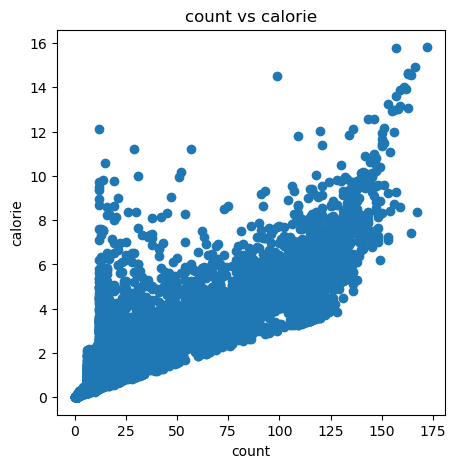

In [941]:
plt.figure(figsize=(5,5))
plt.scatter(data=data,x='count',y='calorie')
plt.title('count vs calorie')
plt.xlabel('count')
plt.ylabel('calorie')
plt.plot()

[]

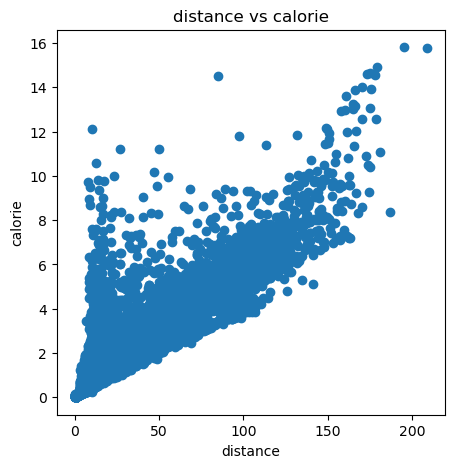

In [942]:
plt.figure(figsize=(5,5))
plt.scatter(data=data,x='distance',y='calorie')
plt.title('distance vs calorie')
plt.xlabel('distance')
plt.ylabel('calorie')
plt.plot()

[]

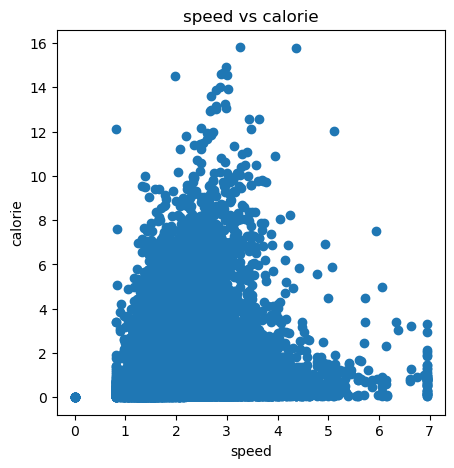

In [943]:
plt.figure(figsize=(5,5))
plt.scatter(data=data,x='speed',y='calorie')
plt.title('speed vs calorie')
plt.xlabel('speed')
plt.ylabel('calorie')
plt.plot()

###  Extracting independent and dependent variables

In [944]:
#Here you should predict the Calories burned based on the number of steps he walked (Count), 
#Distance covered and Speed.

features = ['count','distance','speed']
X = data[features]
y = data['calorie']

### Splitting the dataset into the Training set and Test set 

In [945]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=5)

### Fitting Multivariate Linear Regression to the dataset

In [946]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

#### Train a basic model on just a subset of the features. What is the performance on the testing set?

In [947]:
# If I an training a model on a subset of features that are more narrowed down and related to my current predicting model then the preformance
# will probably be higher as I gave the model what it needs rather than just giving it everything I have.

#### Train a basic model on all of the features. What is the performance on the testing set?

In [948]:
# The model is more likely to either overfit or not grab onto good correlations which will lead to higher inaccuracies and a less precise model.

### Check intercept and weights associated with feature use

In [949]:
print("B1, B2, B3=",lr.coef_)
print("B0=",lr.intercept_)

B1, B2, B3= [-0.01193946  0.06714398  0.04723289]
B0= 0.19892815035144462


### Predict on test data

In [950]:
y_pred = lr.predict(X_test)

In [951]:
## print the Actual Value and Predicted Value as a dataframe
pred_df= pd.DataFrame()
pred_df['yTrue'] = y_test
pred_df['yPred'] = y_pred
pred_df

,yTrue,yPred
1795,4.98,5.311172
9972,0.45,0.896846
9525,4.88,5.244008
7808,4.29,4.463503
3625,1.16,0.433754
...,...,...
8692,0.04,0.343837
10459,7.94,4.248223
7732,0.12,0.395043
1298,6.17,5.229382


### Making a prediction for random value (3, 27, 1.6)

In [952]:
random_y_pred = lr.predict([[3,27,1.6]])
random_y_pred

c:\Users\a_rah\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.05156978])

### Evaluating the model using R-squared Score

In [953]:
print('Testing Score:',  metrics.r2_score(y_test, y_pred))
y_pred = lr.predict(X_train)
print('Training Score:',  metrics.r2_score(y_train, y_pred))

Testing Score: 0.8557981926540733
Training Score: 0.8505727684673643


### Is there any Overfitting/Underfitting happening?

In [954]:
# Explain your answer here:
# No, as the train and test score are extremely close to oneanother so in turn the model is great at generalizing the data. 

__________________________

### Write your observation on which model is the best and why?

In [955]:
# Write your answer here:
# The linear regression model is best for this use case as it is a continueous target label and linear regression is best when it comes to
#  continueous target labels



_____________________________

## Question 2 
### Predict Customer Churn:

Simply put, customer churn occurs when customers or subscribers stop doing business with a company or service. Also known as customer attrition, customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers – earning business from new customers means working leads all the way through the sales funnel, utilizing your marketing and sales resources throughout the process. Customer retention, on the other hand, is generally more cost-effective as you’ve already earned the trust and loyalty of existing customers.

<br>__Columns:__
- customerID 
- gender
- SeniorCitizen
- Partner 
- Dependents	 
- tenure
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- DeviceProtection	
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
- MonthlyCharges	
- TotalCharges
- Churn

<br>In this problem, you will apply basic machine learning concepts on data collected to predict the Customer Churn.

_________________________________________

In [956]:
df = pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [957]:
df.shape

(7043, 21)

In [958]:
##check if there are any missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [959]:
## Check the class balance:
df['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [960]:
# To see the percentage of customers that are leaving
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]

# Print the percentage of customers that stayed
print(numRetained/(numRetained + numChurned) * 100, '% of customers stayed in the company')
# print the percentage of customers that left
print(numChurned/(numRetained + numChurned) * 100 , '% of customers left with the company')

73.4630129206304 % of customers stayed in the company
26.536987079369588 % of customers left with the company


In [961]:
## drop customerID column
cleanDF = df.drop(columns='customerID')
cleanDF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [962]:
print(cleanDF['gender'].unique())
print(cleanDF['Partner'].unique())
print(cleanDF['Dependents'].unique())
print(cleanDF['PhoneService'].unique())
print(cleanDF['MultipleLines'].unique())
print(cleanDF['InternetService'].unique())
print(cleanDF['OnlineSecurity'].unique())
print(cleanDF['OnlineBackup'].unique())
print(cleanDF['DeviceProtection'].unique())
print(cleanDF['TechSupport'].unique())
print(cleanDF['StreamingTV'].unique())
print(cleanDF['StreamingMovies'].unique())
print(cleanDF['Contract'].unique())
print(cleanDF['PaperlessBilling'].unique())
print(cleanDF['PaymentMethod'].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [963]:
## Convert all the non-numveric columns to numeric
le = LabelEncoder()
cleanDF['gender'] = cleanDF['gender'].map(lambda x: 1 if x=='Female' else 0)
cleanDF['Partner'] = cleanDF['Partner'].map(lambda x: 1 if x=='Yes' else 0)
cleanDF['Dependents'] = cleanDF['Dependents'].map(lambda x: 1 if x=='Yes' else 0)
cleanDF['PhoneService'] = cleanDF['PhoneService'].map(lambda x: 1 if x=='Yes' else 0)
cleanDF['MultipleLines'] = le.fit_transform(cleanDF.MultipleLines.values)
cleanDF['InternetService'] = le.fit_transform(cleanDF.InternetService.values)
cleanDF['OnlineSecurity'] = le.fit_transform(cleanDF.OnlineSecurity.values)
cleanDF['OnlineBackup'] = le.fit_transform(cleanDF.OnlineBackup.values)
cleanDF['DeviceProtection'] = le.fit_transform(cleanDF.DeviceProtection.values)
cleanDF['TechSupport'] = le.fit_transform(cleanDF.TechSupport.values)
cleanDF['StreamingTV'] = le.fit_transform(cleanDF.StreamingTV.values)
cleanDF['StreamingMovies'] = le.fit_transform(cleanDF.StreamingMovies.values)
cleanDF['PaperlessBilling'] = cleanDF['PaperlessBilling'].map(lambda x: 1 if x=='Yes' else 0)
cleanDF['Contract'] = le.fit_transform(cleanDF.Contract.values)
cleanDF['PaymentMethod'] = le.fit_transform(cleanDF.PaymentMethod.values)
cleanDF['Churn'] = cleanDF['Churn'].map(lambda x: True if x=='Yes' else False)
# cleanDF['TotalCharges'] = cleanDF['TotalCharges'].astype(float)
cleanDF = cleanDF.drop(columns='TotalCharges')


In [964]:
cleanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int32  


In [965]:
cleanDF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,False
1,0,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,False
2,0,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,True
3,0,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,False
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,True


### Extracting independent and dependent variables

In [966]:
# complete the code to extract features and target
X = cleanDF.drop(columns='Churn')
y = cleanDF['Churn']
X = StandardScaler().fit_transform(X)

### Splitting the dataset into the Training set and Test set

In [967]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Apply Logistic regression algorithim

### Fitting the model to the dataset

In [968]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [969]:
## Create the predictions on the test data
y_pred = lr.predict(X_test)
y_pred_tr = lr.predict(X_train)
#print the predictions
y_pred

array([ True, False, False, ..., False, False,  True])

In [970]:
# Print the Actual Value and Predicted Value as a dataframe
pred_df= pd.DataFrame()
pred_df['yTrue'] = y_test
pred_df['yPred'] = y_pred
pred_df

,yTrue,yPred
185,True,True
2715,False,False
3825,False,False
1807,True,True
132,False,False
...,...,...
6366,False,False
315,False,False
2439,False,False
5002,False,False


### What is your performance (accuracy, Recall and precision)? Is this what you expected and why?

In [971]:
## And Finally check the precision ,recall and f1-score
print('Train Accuracy Score:',accuracy_score(y_train, y_pred_tr))
print('Test Accuracy Score:',accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Train Accuracy Score: 0.8015619453319134
Test Accuracy Score: 0.8197303051809794
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



In [972]:
# Explain your answer here
# The accuracy of the model is 82%, the recall macro is 75% and the precision macro is 77%
# Yes, i expected the model's precision and recall when it comes to True values to be less, 
# sense the data is imbalance having more False than True values



## Apply Support Vector Classification

### Fitting the model to the dataset

In [973]:
#Create svm and show the Train and Test accuracy
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)
y_pred = sv.predict(X_train)
print('Train Accuracy Score:',accuracy_score(y_train, y_pred))
y_pred = sv.predict(X_test)
print('Test Accuracy Score:',accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Train Accuracy Score: 0.7976570820021299
Test Accuracy Score: 0.8197303051809794
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [974]:
# Print the predicted values and show the confusion matrix
print(y_pred)
print(metrics.confusion_matrix(y_test,y_pred))

[ True False False ... False False False]
[[932 104]
 [150 223]]


### Apply Decision Tree Classification

In [975]:
#Create Decision Tree and show the Train and Test accuracy
from sklearn.tree import DecisionTreeClassifier
disT = DecisionTreeClassifier()
disT.fit(X_train, y_train)
y_pred = disT.predict(X_train)
print('Train Accuracy Score:',accuracy_score(y_train, y_pred))
y_pred = disT.predict(X_test)
print('Test Accuracy Score:',accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Train Accuracy Score: 0.9982250621228257
Test Accuracy Score: 0.7139815471965933
              precision    recall  f1-score   support

       False       0.81      0.79      0.80      1036
        True       0.46      0.49      0.48       373

    accuracy                           0.71      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.71      0.72      1409



In [976]:
# Print the predicted values and show the confusion matrix
print(y_pred)
print(metrics.confusion_matrix(y_test,y_pred))

[0. 0. 0. ... 0. 0. 1.]
[[822 214]
 [189 184]]


### Write your observation on which model is the best and why?

In [977]:
# The best model for this Dataset would be Logistic regression as it is the model with the least overfitting and the highest accuracy.